In [116]:
%pylab inline 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


,created_at,engine,fuel,voltage
681,2018-03-01 13:32:08,1,39.153328,630
682,2018-03-01 13:32:19,0,39.153328,630
683,2018-03-01 13:38:08,0,39.153328,630
684,2018-03-01 13:38:13,0,39.153328,630
685,2018-03-01 13:38:18,1,39.308480,620


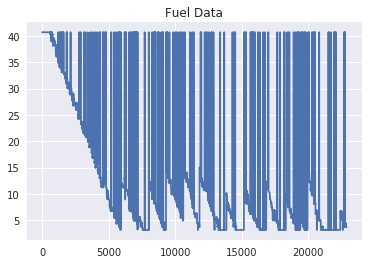

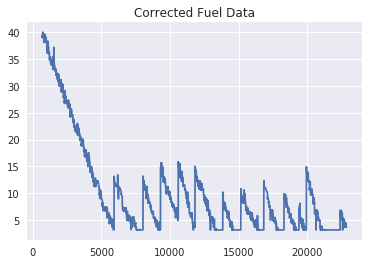

In [162]:
fileName = 'files/864811036264054_TOWNACE.csv'
max_fuel_limit = 40
num_packet_to_check = 20
df = pd.read_csv(fileName)
df['created_at'] = pd.to_datetime(df['created_at'])

df2 = df[df.fuel_litre < max_fuel_limit]
df3 = pd.DataFrame({'fuel': df2.fuel_litre,
                    'engine': df2.engine_status,
                    'created_at':df2.created_at,
                    'voltage': df2.voltage})

plt.plot(df.fuel_litre)
plt.title('Fuel Data')
plt.figure()
plt.plot(df3.fuel)
plt.title('Corrected Fuel Data')
df3.head()

In [144]:
fuel = list(df3.fuel)

temp = fuel[0]
num_refill = 0
count = 0
refilled = []
for i,data in enumerate(fuel):
    if data - temp>5:
        count += 1
        if count > num_packet_to_check:
            num_refill += 1
            count = 0
            refilled.append(data-temp)
            print('\n# New Refill #')
            print('Current Fuel: {}'.format(data))
            print('prev Fuel: {}'.format(temp))
            print('Refill amount: {}'.format(data-temp))
            print('DateTime: {}'.format(df3.iloc[i,0]))
            
        else:
            continue
    count = 0
    temp = data

total_refilled = sum(refilled)
initial_fuel = fuel[0]
remaining_fuel = fuel[-1]
total_used = total_refilled - (initial_fuel + remaining_fuel)

print('\n\n###################################-S-U-M-M-A-R-Y-#####################################')
print('\nTotal Number of Refill: {}'.format(num_refill))
print('Total Refill Amount: {}'.format((refilled)))
print('\nTotal Refilled Fuel: {}'.format(total_refilled))
print('Total Used Fuel: {}'.format(total_used))
print('Total Fuel Remaining: {}'.format(remaining_fuel))



# New Refill #
Current Fuel: 12.921414464186851
prev Fuel: 3.294755696874297
Refill amount: 9.626658767312554
DateTime: 2018-03-12 10:49:28

# New Refill #
Current Fuel: 12.749821394031748
prev Fuel: 3.1870540847880484
Refill amount: 9.5627673092437
DateTime: 2018-03-14 17:56:05

# New Refill #
Current Fuel: 14.756911006713825
prev Fuel: 3.1870540847880484
Refill amount: 11.569856921925776
DateTime: 2018-03-16 23:11:12

# New Refill #
Current Fuel: 15.01303996375553
prev Fuel: 5.223550946904028
Refill amount: 9.789489016851501
DateTime: 2018-03-19 15:09:33

# New Refill #
Current Fuel: 14.756911006713825
prev Fuel: 3.7936662913483454
Refill amount: 10.96324471536548
DateTime: 2018-03-21 16:05:27

# New Refill #
Current Fuel: 9.677703248780356
prev Fuel: 3.1870540847880484
Refill amount: 6.490649163992307
DateTime: 2018-03-25 16:19:52

# New Refill #
Current Fuel: 10.574585624452178
prev Fuel: 3.1870540847880484
Refill amount: 7.3875315396641295
DateTime: 2018-03-28 11:56:53

# New Ref

In [132]:
def filter_fuel(data, prev_data, count,max_fuel_limit,num_packet_to_check):
    if data >= max_fuel_limit:
        z = prev_data
        return [z, prev_data, count]
    if data-prev_data>5:
        count += 1
        if count > num_packet_to_check:
            z = data
            refill = True
            fuel_refilled = data-prev_data
            count = 0
        else:
            z = prev_data
            return [z, prev_data, count]
    count = 0
    z = data
    prev_data = data
    return [z, prev_data, count]

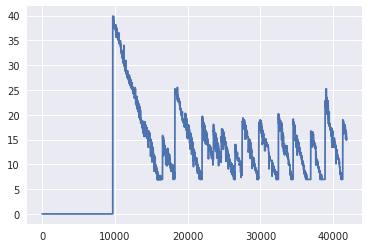

In [136]:
max_fuel_limit = 40
num_packet_to_check = 50
count = 0
new_data = []
for i,data in enumerate(fuel):
    if i == 0:
        data, prev_data, count = filter_fuel(data,data,count,max_fuel_limit,num_packet_to_check)
    else:
        data, prev_data, count = filter_fuel(data,prev_data,count,max_fuel_limit,num_packet_to_check)
        new_data.append(data)
        
plt.plot(new_data)

# Get Summary of all the files in a directory



---------------------------FILE NAME:864287038300255_FORTUNER.csv---------------------------------

# New Refill #
Current Fuel: 52.88999905909792
prev Fuel: 47.75965454459346
Refill amount: 5.130344514504458
DateTime: 2018-03-01 10:53:45

# New Refill #
Current Fuel: 52.88999905909792
prev Fuel: 47.82474026460279
Refill amount: 5.065258794495129
DateTime: 2018-03-01 15:59:01

# New Refill #
Current Fuel: 52.88999905909792
prev Fuel: 27.72916055753177
Refill amount: 25.160838501566147
DateTime: 2018-03-03 17:06:26

# New Refill #
Current Fuel: 52.36829676769082
prev Fuel: 21.160081881255493
Refill amount: 31.20821488643533
DateTime: 2018-03-04 09:17:05

# New Refill #
Current Fuel: 52.88999905909792
prev Fuel: 37.43013730185137
Refill amount: 15.45986175724655
DateTime: 2018-03-07 10:25:01

# New Refill #
Current Fuel: 52.88999905909792
prev Fuel: 37.65600912941297
Refill amount: 15.233989929684945
DateTime: 2018-03-07 11:14:14

# New Refill #
Current Fuel: 52.88999905909792
prev Fue


# New Refill #
Current Fuel: 15.808344761347813
prev Fuel: 6.963793655403948
Refill amount: 8.844551105943864
DateTime: 2018-03-15 09:55:38

# New Refill #
Current Fuel: 25.3285756300183
prev Fuel: 8.278176606817704
Refill amount: 17.050399023200598
DateTime: 2018-03-17 20:28:23

# New Refill #
Current Fuel: 17.279063584344268
prev Fuel: 6.963793655403948
Refill amount: 10.315269928940321
DateTime: 2018-03-20 07:45:50

# New Refill #
Current Fuel: 17.75523889966037
prev Fuel: 11.020523725040873
Refill amount: 6.734715174619497
DateTime: 2018-03-21 07:52:04

# New Refill #
Current Fuel: 18.332104762212147
prev Fuel: 8.478472182731185
Refill amount: 9.853632579480962
DateTime: 2018-03-24 14:49:30

# New Refill #
Current Fuel: 18.459351739630254
prev Fuel: 7.223106856568201
Refill amount: 11.236244883062053
DateTime: 2018-03-26 12:03:34

# New Refill #
Current Fuel: 19.357316331998845
prev Fuel: 6.9637916022285316
Refill amount: 12.393524729770313
DateTime: 2018-03-30 16:02:24

# New Ref


# New Refill #
Current Fuel: 41.1010244119744
prev Fuel: 17.032997430722606
Refill amount: 24.068026981251794
DateTime: 2018-03-09 09:23:08

# New Refill #
Current Fuel: 42.032929650623934
prev Fuel: 15.296121039667039
Refill amount: 26.736808610956896
DateTime: 2018-03-17 11:58:35

# New Refill #
Current Fuel: 27.579246629800767
prev Fuel: 13.039609548844853
Refill amount: 14.539637080955915
DateTime: 2018-03-30 17:59:45

# New Refill #
Current Fuel: 41.22954881933344
prev Fuel: 13.799598810024396
Refill amount: 27.429950009309042
DateTime: 2018-04-02 11:24:21


###################################-S-U-M-M-A-R-Y-#####################################

Total Number of Refill: 4
Total Refill Amount: [24.068026981251794, 26.736808610956896, 14.539637080955915, 27.429950009309042]

Total Refilled Fuel: 92.77442268247364
Total Used Fuel: 37.0479552662207
Total Fuel Remaining: 23.516627011026248


---------------------------FILE NAME:865209032031016_F-PREMIO.csv------------------------------

/home/orion/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



DateTime: 2018-03-17 07:22:54


###################################-S-U-M-M-A-R-Y-#####################################

Total Number of Refill: 1
Total Refill Amount: [23.888024999659685]

Total Refilled Fuel: 23.888024999659685
Total Used Fuel: -37.014408152253736
Total Fuel Remaining: 22.39390403914325


---------------------------FILE NAME:866192035922887_AXIO.csv---------------------------------

# New Refill #
Current Fuel: 44.36864897752224
prev Fuel: 22.80799107747639
Refill amount: 21.56065790004585
DateTime: 2018-03-06 13:11:38

# New Refill #
Current Fuel: 46.3401952689667
prev Fuel: 14.147044906993433
Refill amount: 32.19315036197327
DateTime: 2018-03-08 20:26:01

# New Refill #
Current Fuel: 27.22395612120018
prev Fuel: 13.907117161059055
Refill amount: 13.316838960141126
DateTime: 2018-03-19 08:21:13

# New Refill #
Current Fuel: 45.990071857028504
prev Fuel: 12.606696733946734
Refill amount: 33.38337512308177
DateTime: 2018-03-20 09:23:55

# New Refill #
Current Fuel: 39


# New Refill #
Current Fuel: 41.60538833680483
prev Fuel: 25.80967171743953
Refill amount: 15.795716619365297
DateTime: 2018-03-08 22:34:57

# New Refill #
Current Fuel: 42.17088202504715
prev Fuel: 26.29201229786541
Refill amount: 15.87886972718174
DateTime: 2018-03-13 10:18:26

# New Refill #
Current Fuel: 43.82567789993396
prev Fuel: 29.0568452686726
Refill amount: 14.768832631261358
DateTime: 2018-03-18 17:19:13

# New Refill #
Current Fuel: 41.74053777341497
prev Fuel: 26.71635415941572
Refill amount: 15.024183613999252
DateTime: 2018-03-27 08:01:14

# New Refill #
Current Fuel: 42.9330439045918
prev Fuel: 36.40618335718389
Refill amount: 6.526860547407907
DateTime: 2018-03-28 07:51:49

# New Refill #
Current Fuel: 41.752665553905956
prev Fuel: 23.07509546574543
Refill amount: 18.677570088160525
DateTime: 2018-04-03 16:53:48

# New Refill #
Current Fuel: 22.50450879751617
prev Fuel: 15.048993224862834
Refill amount: 7.455515572653336
DateTime: 2018-04-08 13:20:32


##############


# New Refill #
Current Fuel: 46.057876945783406
prev Fuel: 20.83427054914128
Refill amount: 25.223606396642126
DateTime: 2018-03-29 14:47:34

# New Refill #
Current Fuel: 32.41413634496198
prev Fuel: 2.3386601563288263
Refill amount: 30.075476188633154
DateTime: 2018-04-01 21:06:01

# New Refill #
Current Fuel: 17.18409773361731
prev Fuel: 7.2746415306133
Refill amount: 9.90945620300401
DateTime: 2018-04-07 20:16:46

# New Refill #
Current Fuel: 39.12356336403203
prev Fuel: 8.984371104952137
Refill amount: 30.13919225907989
DateTime: 2018-04-08 22:16:46


###################################-S-U-M-M-A-R-Y-#####################################

Total Number of Refill: 4
Total Refill Amount: [25.223606396642126, 30.075476188633154, 9.90945620300401, 30.13919225907989]

Total Refilled Fuel: 95.34773104735918
Total Used Fuel: 20.44955803767678
Total Fuel Remaining: 30.766858255576512


---------------------------FILE NAME:866192035956976_FORTUNER.csv---------------------------------
@@@@@@

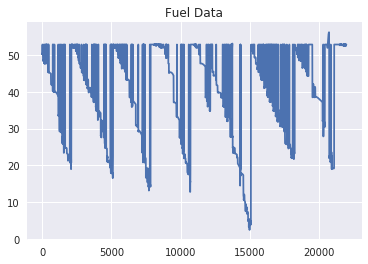

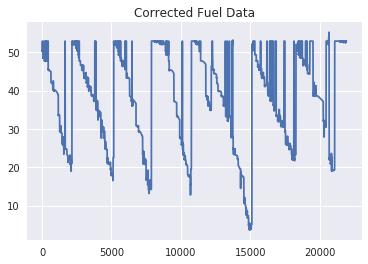

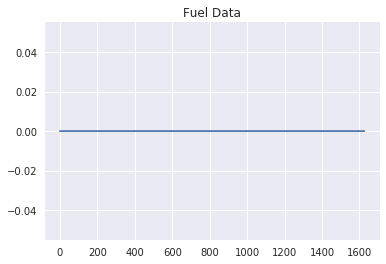

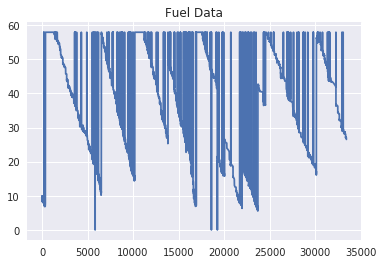

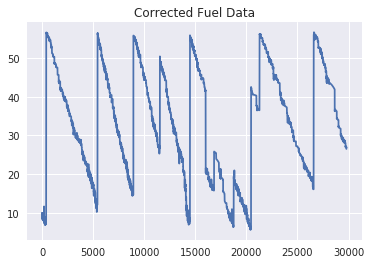

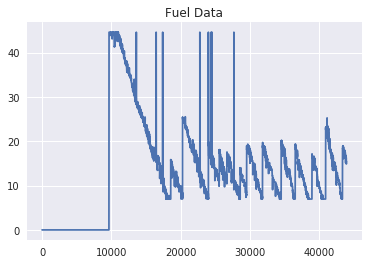

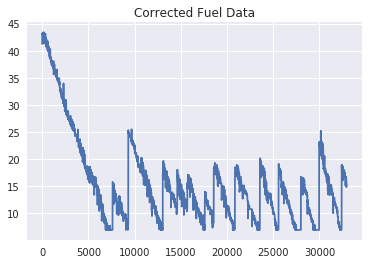

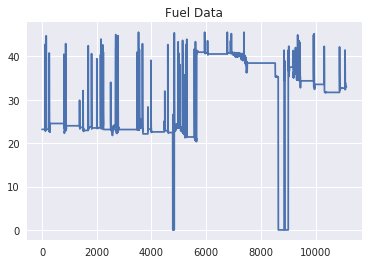

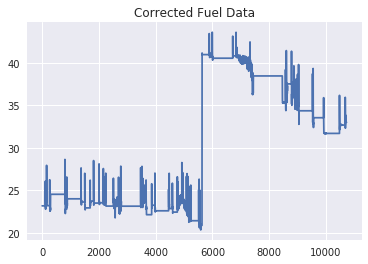

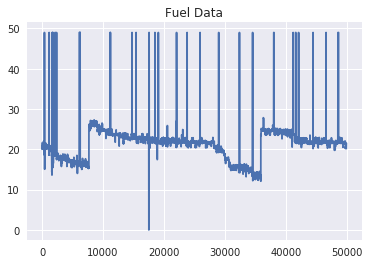

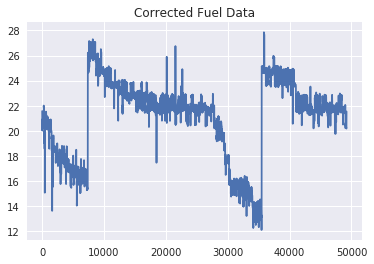

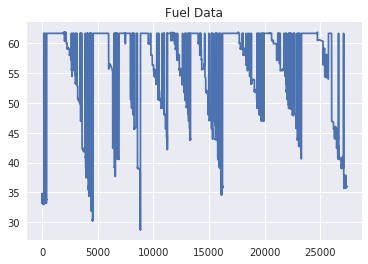

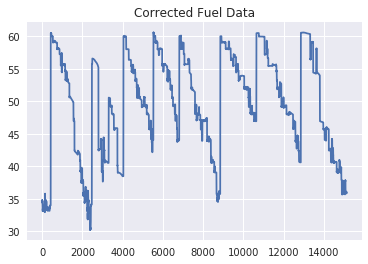

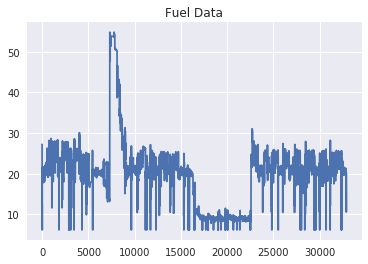

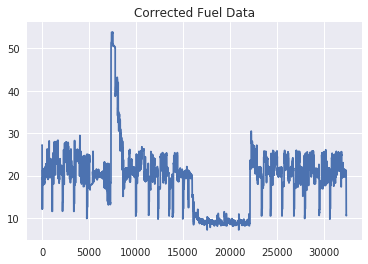

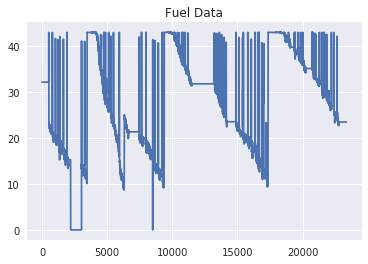

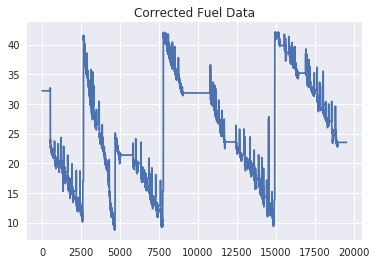

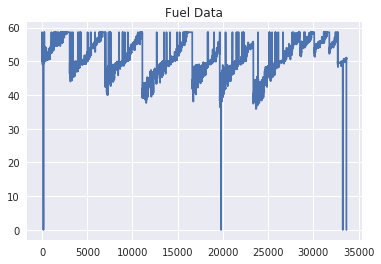

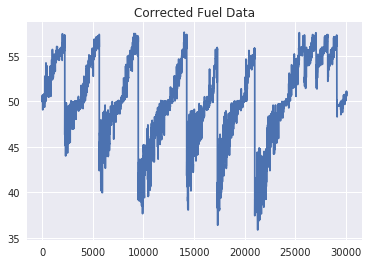

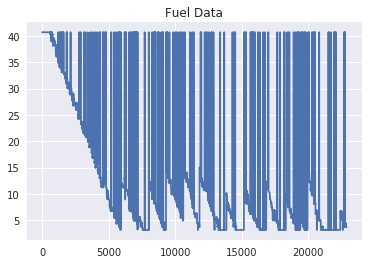

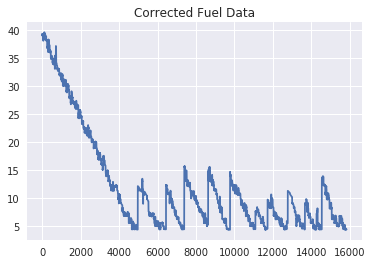

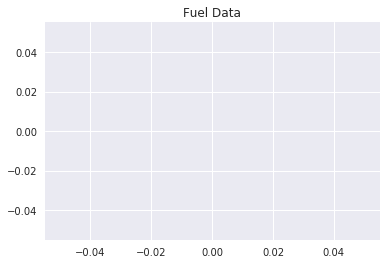

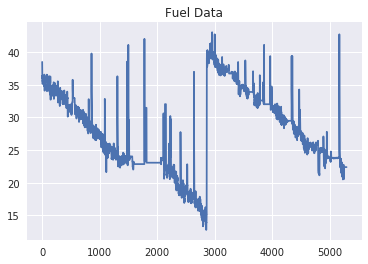

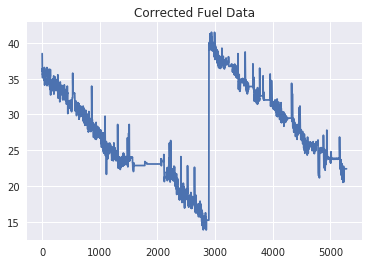

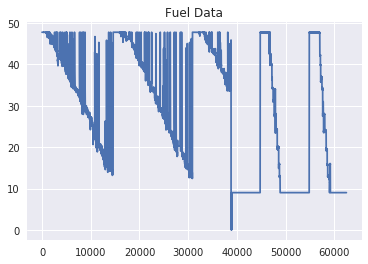

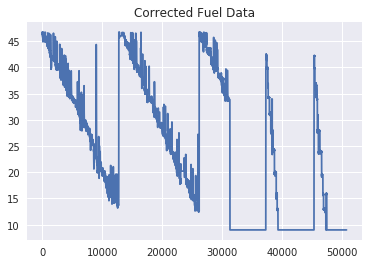

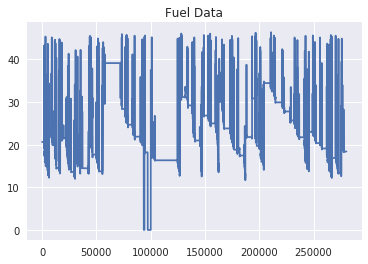

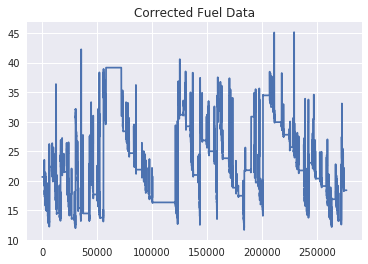

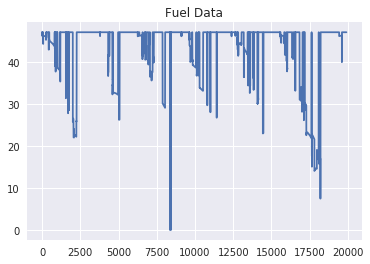

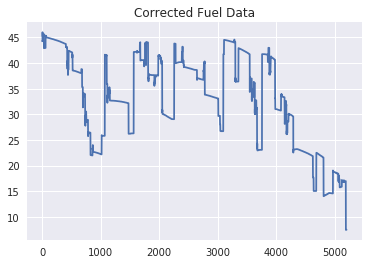

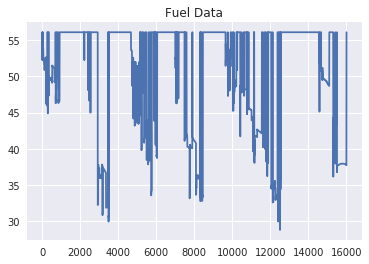

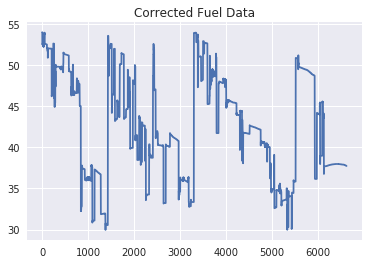

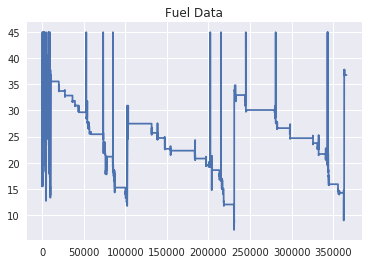

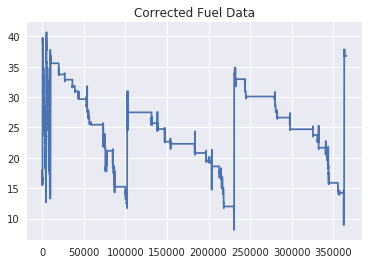

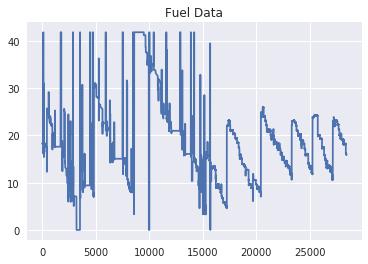

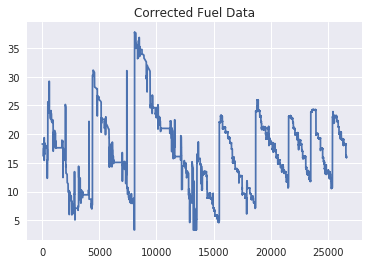

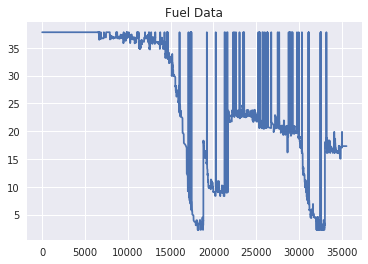

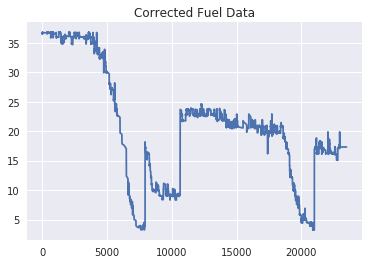

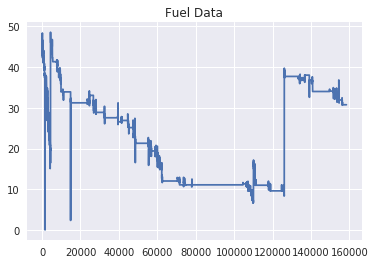

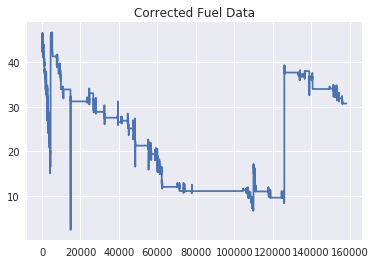

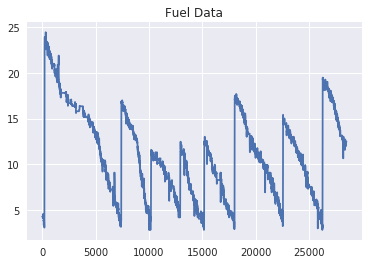

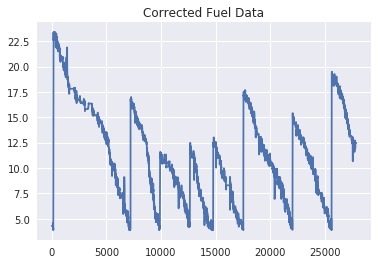

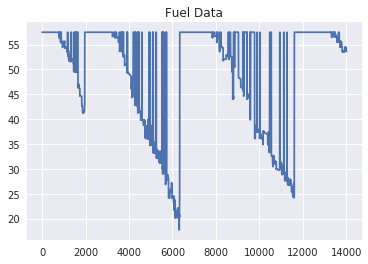

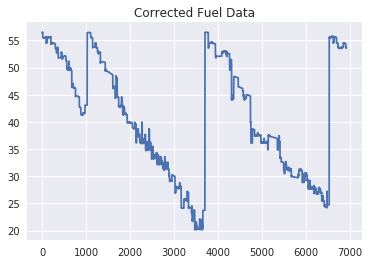

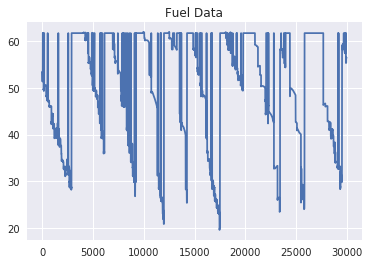

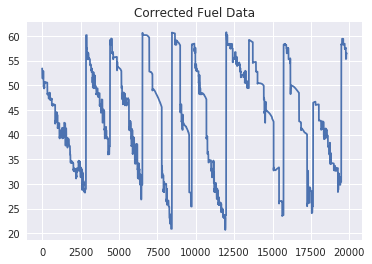

In [160]:
import os
files = os.listdir('files/')
num_packet_to_check = 40
folder = 'files/'
for fileName in files:
    
    try:
        print('\n\n---------------------------FILE NAME:'+ fileName + '---------------------------------')

        df = pd.read_csv(folder + fileName)
        min_fuel_limit = min(df.fuel_litre)+1
        max_fuel_limit = max(df.fuel_litre)-1
        min_fuel_refill = 5
        df['created_at'] = pd.to_datetime(df['created_at'])

        df2 = df[df['fuel_litre'].between(min_fuel_limit, max_fuel_limit, inclusive=False)]
    #     df2 = df[df.fuel_litre < max_fuel_limit]
        df3 = pd.DataFrame({'fuel': df2.fuel_litre,
                            'engine': df2.engine_status,
                            'created_at':df2.created_at,
                            'voltage': df2.voltage})

        plt.figure()
        plt.plot(df.fuel_litre)
        plt.title('Fuel Data')
    #     df3.head()

        fuel = list(df3.fuel)
        temp = fuel[0]
        num_refill = 0
        count = 0
        refilled = []
        z = []
        for i,data in enumerate(fuel):
            if data - temp>=min_fuel_refill:
                count += 1
                if count > num_packet_to_check:
                    num_refill += 1
                    count = 0
                    refilled.append(data-temp)
                    z.append(data)
                    print('\n# New Refill #')
                    print('Current Fuel: {}'.format(data))
                    print('prev Fuel: {}'.format(temp))
                    print('Refill amount: {}'.format(data-temp))
                    print('DateTime: {}'.format(df3.iloc[i,0]))

                else:
                    z.append(temp)
                    continue
            z.append(data)
            count = 0
            temp = data

        total_refilled = sum(refilled)
        initial_fuel = fuel[0]
        remaining_fuel = fuel[-1]
        total_used = total_refilled - (initial_fuel + remaining_fuel)

        print('\n\n###################################-S-U-M-M-A-R-Y-#####################################')
        print('\nTotal Number of Refill: {}'.format(num_refill))
        print('Total Refill Amount: {}'.format((refilled)))
        print('\nTotal Refilled Fuel: {}'.format(total_refilled))
        print('Total Used Fuel: {}'.format(total_used))
        print('Total Fuel Remaining: {}'.format(remaining_fuel))
        
        plt.figure()
        plt.plot(z)
        plt.title('Corrected Fuel Data')
    except:
        print('@@@@@@@@@@@@@@@@@@@@@@@'+fileName + 'Failed@@@@@@@@@@@@@@@@@@@@@@@@@@')
        
    

# Summary of specific DateTime Data 


#######################FileName-866192035971942.csv###########################

# New Refill #
Current Fuel: 46.587426338089294
prev Fuel: 10.826019274976002
Refill amount: 35.761407063113296
DateTime: 2018-04-13 13:43:43

# New Refill #
Current Fuel: 46.53579738508229
prev Fuel: 16.597094078205302
Refill amount: 29.938703306876988
DateTime: 2018-04-18 17:08:22


###################################-S-U-M-M-A-R-Y-#####################################

Total Number of Refill: 2
Total Refill Amount: [35.761407063113296, 29.938703306876988]

Total Refilled Fuel: 65.70011036999028
Total Used Fuel: 13.313900515648484
Total Fuel Remaining: 26.525231433308896


Text(0.5,1,'Corrected Fuel Data')

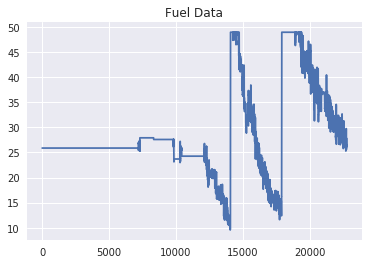

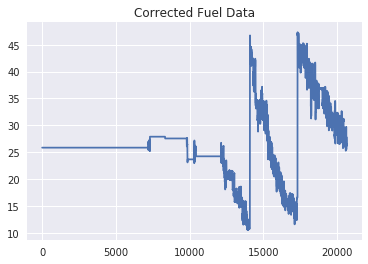

In [218]:
fileName = '866192035971942.csv'

df = pd.read_csv(fileName)
# df.columns.values
min_fuel_limit = min(df.fuel_litre)+1
max_fuel_limit = max(df.fuel_litre)-1
min_fuel_refill = 5
num_packet_to_check = 40

df['created_at'] = pd.to_datetime(df['created_at'])

df2 = df[df['fuel_litre'].between(min_fuel_limit, max_fuel_limit, inclusive=False)]
#     df2 = df[df.fuel_litre < max_fuel_limit]
df3 = pd.DataFrame({'fuel': df2.fuel_litre,
                    'engine': df2.engine_status,
                    'created_at':df2.created_at})

# mask = (df3['created_at']>'2018-04-12') & (df3['created_at']<'2018-04-13')
# df3 = df3.loc[mask]

plt.figure()
plt.plot(df.fuel_litre)
plt.title('Fuel Data')
# print(df.created_at.head())
print('#######################FileName-'+fileName+'###########################')
fuel = list(df3.fuel)
temp = fuel[0]
num_refill = 0
count = 0
refilled = []
z = []
for i,data in enumerate(fuel):
    if data - temp>=min_fuel_refill:
        count += 1
        if count > num_packet_to_check:
            num_refill += 1
            count = 0
            refilled.append(data-temp)
            z.append(data)
            print('\n# New Refill #')
            print('Current Fuel: {}'.format(data))
            print('prev Fuel: {}'.format(temp))
            print('Refill amount: {}'.format(data-temp))
            print('DateTime: {}'.format(df3.iloc[i,0]))

        else:
            z.append(temp)
            continue
    z.append(data)
    count = 0
    temp = data

total_refilled = sum(refilled)
initial_fuel = fuel[0]
remaining_fuel = fuel[-1]
total_used = total_refilled - (initial_fuel + remaining_fuel)

print('\n\n###################################-S-U-M-M-A-R-Y-#####################################')
print('\nTotal Number of Refill: {}'.format(num_refill))
print('Total Refill Amount: {}'.format((refilled)))
print('\nTotal Refilled Fuel: {}'.format(total_refilled))
print('Total Used Fuel: {}'.format(total_used))
print('Total Fuel Remaining: {}'.format(remaining_fuel))

plt.figure()
plt.plot(z)
plt.title('Corrected Fuel Data')